In [22]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Dataset Collection

In [23]:
#import dataset
data = pd.read_csv("spambase.csv")
data.head()
#data.count()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [24]:
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [25]:
data.dtypes


word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

# Data Preparation

In [26]:
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

# Data Exploration

In [27]:
grouped_data = data.groupby(data['class'])
grouped_data[data.columns[0]].describe(include='all').transpose()

class,0,1
count,2788.000000,1813.000000
mean,0.073479,0.152339
std,0.297838,0.310645
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.170000
max,4.340000,4.540000


In [28]:
print('index','  ','0s','     ','other', '     columns')
for i in range(len(data.columns)):
    c = data[data[data.columns[i]] == 0].shape[0]
    print (i,'    ',c,'     ',4601-c,'   ', data.columns[i])

index    0s       other      columns
0      3548       1053     word_freq_make
1      3703       898     word_freq_address
2      2713       1888     word_freq_all
3      4554       47     word_freq_3d
4      2853       1748     word_freq_our
5      3602       999     word_freq_over
6      3794       807     word_freq_remove
7      3777       824     word_freq_internet
8      3828       773     word_freq_order
9      3299       1302     word_freq_mail
10      3892       709     word_freq_receive
11      2276       2325     word_freq_will
12      3749       852     word_freq_people
13      4244       357     word_freq_report
14      4265       336     word_freq_addresses
15      3360       1241     word_freq_free
16      3638       963     word_freq_business
17      3563       1038     word_freq_email
18      1374       3227     word_freq_you
19      4177       424     word_freq_credit
20      2178       2423     word_freq_your
21      4484       117     word_freq_font
22      3922     

In [29]:
%%capture cap --no-stderr
print('index','  ','0s','     ','other', '     columns')
for i in range(len(data.columns)):
    c = data[data[data.columns[i]] == 0].shape[0]
    print (i,'    ',c,'     ',4601-c,'   ', data.columns[i])
with open('output.txt', 'w') as f:
    f.write(cap.stdout)

# Data Modelling

## Classification

In [30]:
#Splitting dataset for classification
#creating test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data['class'],test_size=0.2, random_state=0)
#x_test = x_test.iloc[:,:-1]

In [31]:
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
36,0.00,0.0,0.00,0.0,2.94,0.00,0.00,0.00,0.00,0.00,...,0.0,0.436,0.436,0.000,0.873,0.000,0.0,4.142,12,29
706,0.00,0.0,0.00,0.0,0.84,1.27,0.42,0.00,0.00,0.42,...,0.0,0.097,0.097,1.171,0.244,0.390,0.0,26.405,363,977
1559,0.32,0.0,0.80,0.0,0.80,0.32,0.16,0.00,0.64,0.00,...,0.0,0.000,0.050,0.000,0.050,0.075,0.0,1.419,15,159
1349,0.18,0.0,0.09,0.0,0.36,0.09,0.00,0.36,0.09,0.00,...,0.0,0.000,0.059,0.029,0.029,0.014,0.0,4.192,48,566
3878,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.13,0.00,...,0.0,0.125,0.438,0.146,0.000,0.000,0.0,3.657,35,534


In [32]:
#creating validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=0)

In [33]:
#x_val.count()

In [34]:
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
438,0.00,0.00,0.00,0.0,1.31,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.251,0.000,1.007,0.000,0.0,1.440,8,36
321,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.67,0.0,0.67,...,0.0,0.170,0.511,0.085,0.511,0.000,0.0,4.617,27,217
448,0.12,0.12,0.24,0.0,1.34,0.12,0.0,0.12,0.0,0.00,...,0.0,0.061,0.020,0.000,0.041,0.041,0.0,2.351,69,254
4459,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,19.131,0.000,0.0,13.250,48,53
3500,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,1.96,...,0.0,0.000,0.373,0.000,0.000,0.000,0.0,1.857,11,26


In [35]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(2760, 57)
(920, 57)
(921, 57)


In [36]:
#standardizing datasets for classification
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val)
x_val_scaled = pd.DataFrame(x_val_scaled)

### Decision Tree

In [37]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
# structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 170, 51, -2.56982386e-01, 0.96232475, 2760, 2.760e+03, 1)
 (  2, 145,  6, -1.83848463e-01, 0.61775685, 1632, 1.632e+03, 1)
 (  3, 126, 52, -7.71169402e-02, 0.45238162, 1508, 1.508e+03, 1)
 (  4,  99, 15, -1.73892006e-01, 0.35119077, 1407, 1.407e+03, 1)
 (  5,  98, 26, -2.29724139e-01, 0.26208136, 1284, 1.284e+03, 1)
 (  6,  91, 24, -3.13460872e-01, 0.339719  ,  903, 9.030e+02, 1)
 (  7,  54, 55, -2.91435421e-01, 0.44661061,  591, 5.910e+02, 1)
 (  8,  49,  7,  1.73588783e+00, 0.23016274,  428, 4.280e+02, 1)
 (  9,  30, 11,  3.06016490e-01, 0.19914574,  420, 4.200e+02, 1)
 ( 10,  29, 54, -1.18809063e-01, 0.12536979,  349, 3.490e+02, 0)
 ( 11,  12, 56, -4.49156404e-01, 0.24602258,  147, 1.470e+02, 1)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   92, 9.200e+01, 0)
 ( 13,  28, 49, -5.29353008e-01, 0.49716776,   55, 5.500e+01, 1)
 ( 14,  27,  2, -1.49928108e-01, 0.72192809,   30, 3.000e+01, 1)
 ( 15,  26, 44, -1.29735893e-01, 0.8812909 ,   20, 2.000e+01, 1)
 ( 16,  25, 56, -4.241757

307

In [39]:
y_pred = classifier.predict(x_val_scaled)

In [ ]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.908695652173913 
Error =  0.09130434782608698 
Precision = [0.91992883 0.89106145] 
Recall =  [0.92985612 0.87637363] 
F1 Score =  [0.92486583 0.88365651]


#### Selecting best set of attributes

In [ ]:
cols = [0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,20,22,23,24,36,44,49,51,52,56]
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [ ]:
# structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 224, 22, -2.56982386e-01, 0.96232475, 2760, 2.760e+03)
 (  2, 197,  5, -1.83848463e-01, 0.61775685, 1632, 1.632e+03)
 (  3, 174, 23, -7.71169402e-02, 0.45238162, 1508, 1.508e+03)
 (  4, 135, 12, -1.73892006e-01, 0.35119077, 1407, 1.407e+03)
 (  5, 128, 18, -3.13460872e-01, 0.26208136, 1284, 1.284e+03)
 (  6,  49, 24, -4.20845032e-01, 0.35521609,  819, 8.190e+02)
 (  7,  44, 10,  6.19896388e+00, 0.13086919,  441, 4.410e+02)
 (  8,  43,  6,  1.98172393e+01, 0.10461243,  437, 4.370e+02)
 (  9,  10, 24, -4.49156404e-01, 0.09037439,  436, 4.360e+02)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  248, 2.480e+02)
 ( 11,  42, 24, -4.34168026e-01, 0.17702124,  188, 1.880e+02)
 ( 12,  31, 24, -4.35833409e-01, 0.23382826,  131, 1.310e+02)
 ( 13,  30, 20, -1.99380763e-01, 0.16866093,  120, 1.200e+02)
 ( 14,  29, 21, -2.29925323e-01, 0.21639693,   87, 8.700e+01)
 ( 15,  26, 15,  7.37877488e-01, 0.25524211,   70, 7.000e+01)
 ( 16,  23, 10,  4.97421280e-01, 0.20818095,   61, 6.100e+01)
 ( 17,  

379

In [ ]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

In [ ]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.9163043478260869 
Error =  0.08369565217391306 
Precision = [0.93466425 0.88888889] 
Recall =  [0.92625899 0.9010989 ] 
F1 Score =  [0.93044264 0.89495225]


[[515  41]
 [ 36 328]]


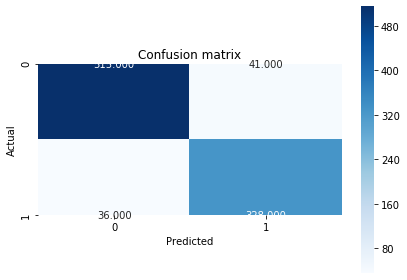

In [ ]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [ ]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.9163043478260869 
Error =  0.08369565217391306 
Precision = [0.93466425 0.88888889] 
Recall =  [0.92625899 0.9010989 ] 
F1 Score =  [0.93044264 0.89495225]


### k Nearest Neighbors

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3, weights='distance')  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(x_val_scaled)

[[530  26]
 [ 48 316]]


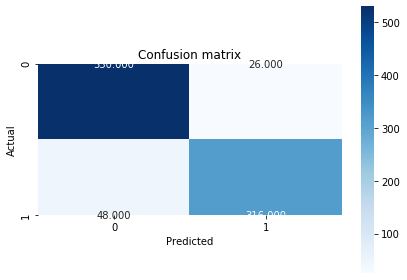

In [ ]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [ ]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.9195652173913044 
Error =  0.08043478260869563 
Precision = [0.91695502 0.92397661] 
Recall =  [0.95323741 0.86813187] 
F1 Score =  [0.93474427 0.89518414]


#### Selecting best set of attributes

In [ ]:
cols = [0,1,2,5,6,8,11,16,18,20,22,23,24,49,51,56]
classifier = KNeighborsClassifier(n_neighbors = 5, weights='distance')  
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
#selecting optimal value of K
cols = [0,1,2,5,6,8,11,16,18,20,22,23,24,49,51,56]
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i,weights='distance')  
    classifier.fit(x_train_scaled.iloc[:,cols],y_train)
    y_pred = classifier.predict(x_val_scaled.iloc[:,cols])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_val, y_pred, average = None)
    recall = metrics.recall_score(y_val, y_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_pred, average = None)
    print([i,accuracy, error, precision, recall, F1_score])

[1, 0.8858695652173914, 0.11413043478260865, array([0.90196078, 0.86072423]), array([0.91007194, 0.8489011 ]), array([0.90599821, 0.85477178])]
[2, 0.8858695652173914, 0.11413043478260865, array([0.90196078, 0.86072423]), array([0.91007194, 0.8489011 ]), array([0.90599821, 0.85477178])]
[3, 0.9141304347826087, 0.08586956521739131, array([0.91478261, 0.91304348]), array([0.94604317, 0.86538462]), array([0.93015031, 0.88857546])]
[4, 0.9130434782608695, 0.08695652173913049, array([0.90893471, 0.92011834]), array([0.95143885, 0.8543956 ]), array([0.92970123, 0.88603989])]
[5, 0.9163043478260869, 0.08369565217391306, array([0.90940171, 0.92835821]), array([0.95683453, 0.8543956 ]), array([0.93251534, 0.88984263])]
[6, 0.9152173913043479, 0.08478260869565213, array([0.90508475, 0.93333333]), array([0.96043165, 0.84615385]), array([0.93193717, 0.88760807])]
[7, 0.9108695652173913, 0.08913043478260874, array([0.90033784, 0.92987805]), array([0.95863309, 0.83791209]), array([0.92857143, 0.8815

In [ ]:
# k=5 is most optimal

In [ ]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

### Naive Bayes

In [ ]:
classifier = GaussianNB()  
classifier.fit(x_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(x_val_scaled)

[[410 146]
 [ 13 351]]


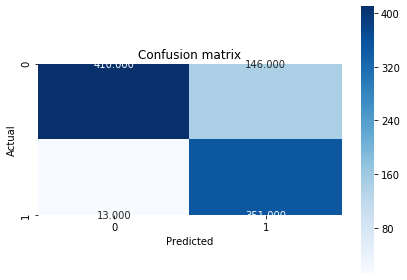

In [ ]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [ ]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.8271739130434783 
Error =  0.17282608695652169 
Precision = [0.96926714 0.70623742] 
Recall =  [0.73741007 0.96428571] 
F1 Score =  [0.83758938 0.81533101]


#### Selecting best set of attributes

### SVM

In [ ]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(x_val_scaled)

In [ ]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.9228260869565217 
Error =  0.07717391304347831 
Precision = [0.91882556 0.92961877] 
Recall =  [0.95683453 0.87087912] 
F1 Score =  [0.93744493 0.89929078]


#### Selecting best set of attributes

In [ ]:
accuracy = metrics.accuracy_score(y_val,SVM_y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, SVM_y_pred, average = None)
recall = metrics.recall_score(y_val, SVM_y_pred, average = None)
F1_score = metrics.f1_score(y_val, SVM_y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.925 
Error =  0.07499999999999996 
Precision = [0.92055268 0.93255132] 
Recall =  [0.95863309 0.87362637] 
F1 Score =  [0.93920705 0.90212766]


[[533  23]
 [ 46 318]]


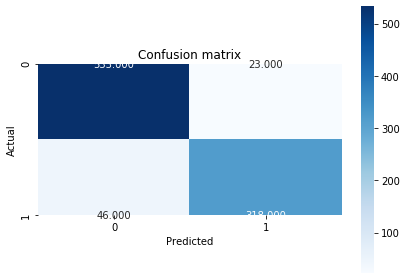

In [ ]:
conf_matrix = metrics.confusion_matrix(y_val,SVM_y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

### K Means

In [ ]:
clustering = KMeans(n_clusters = 2,init = 'random',n_init = 10, random_state = 0).fit(data_x_scaled)
clusters = clustering.labels_
print("Clusters are : ",np.unique(clusters))
print("Number of clusters = ",len(clusters))

Clusters are :  [0 1]
Number of clusters =  4601


In [ ]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled,clusters)
print("Adjusted Random Index =",adjusted_rand_index, "\nSilhouette Coefficient = ",silhouette_coefficient)

Adjusted Random Index = -0.00494969888751084 
Silhouette Coefficient =  0.659630943933575


[[  34    0]
 [2754 1813]]


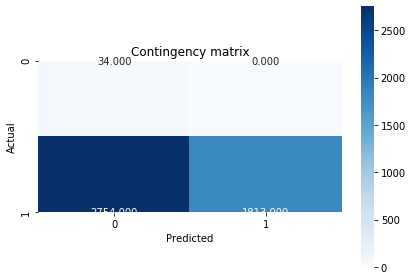

In [ ]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

#### Trying with different sets of attributes

In [ ]:
#cols = [0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,18,20,22,23,24,36,44,49,51,52,56]
#cols = [0,1,2,4,5,6,7,8,9,10,11,12,15,16,17,20,22,23,24,36,44,49,51,52,56]
#cols = [4,5,6,8,16,18,20,23,24,51,56]
#cols = [0,1,2,4,6,8,11,15,16,17,20,23,24,36,44,49,52,56]
Kmeans_cols = [4,6,7,8,9,15,20,22,23,24,36,52,56]


clustering = KMeans(n_clusters = 2,init = 'random',n_init = 10, random_state = 0).fit(data_x_scaled.iloc[:,Kmeans_cols])
clusters = clustering.labels_
print("Clusters are : ",np.unique(clusters))
print("Number of clusters = ",len(clusters))

Clusters are :  [0 1]
Number of clusters =  4601


In [ ]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled.iloc[:,Kmeans_cols],clusters)
print("Adjusted Random Index =",adjusted_rand_index, "\nSilhouette Coefficient = ",silhouette_coefficient)

Adjusted Random Index = 0.45958819954640473 
Silhouette Coefficient =  0.3325948013999686


[[2644  590]
 [ 144 1223]]


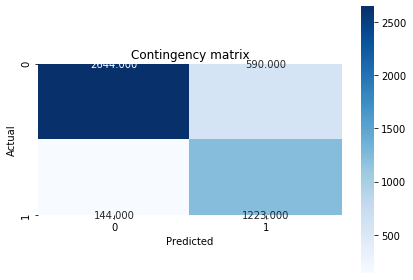

In [ ]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

## Performance with Test dataset - Classification using SVM

In [ ]:
#Standardizaing the test dataset
scaler = StandardScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled)

In [ ]:
test_y_pred = SVM_classifier.predict(x_test_scaled.iloc[:,SVM_cols])

In [ ]:
accuracy = metrics.accuracy_score(y_test,test_y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, test_y_pred, average = None)
recall = metrics.recall_score(y_test, test_y_pred, average = None)
F1_score = metrics.f1_score(y_test, test_y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.9001085776330076 
Error =  0.09989142236699244 
Precision = [0.88448276 0.92668622] 
Recall =  [0.9535316  0.82506527] 
F1 Score =  [0.9177102  0.87292818]


In [ ]:
conf_matrix = metrics.confusion_matrix(y_test,test_y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)